In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [2]:
Data = pd.read_csv('Airnbn.csv')
# Suppression des colonnes
to_deleted =['id','description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 
    'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'name',
    'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'instant_bookable']
Data.drop(to_deleted, axis=1, inplace=True)
# Modification des log_price
Data['log_price']=Data['log_price'].apply(lambda x : math.exp(x))
Data.rename(columns={'log_price' : 'price'}, inplace=True)

In [3]:
Data=Data[(Data['price']>20) & (Data['price']<500)]
Data.drop_duplicates(inplace=True)

In [4]:
Dt=Data.groupby(['property_type'])['price'].mean()>200
Timeshare=Dt[Dt==True].index
Data['property_type']=Data['property_type'].apply(lambda x : 'Timeshare' if x in Timeshare else x)
# Selection des types de propriétés à supprimer
Dt=Data['property_type'].value_counts()<=50
to_deleted=Dt[Dt==True].index
# Suppression des types de propriétés sélectionnés.
Data=Data[Data['property_type'].isin(to_deleted)==False]

In [5]:
pd.options.mode.copy_on_write = True
Data.dropna(how='any', axis=0, inplace=True)

In [6]:
# Sauvegarde des données originales
Data_originale = Data.copy()

In [7]:
# Représentation des types de chambre en fonction des prix moyens
PrixM=Data['price'].mean()
Dt=pd.DataFrame(Data.groupby(['room_type'])['price'].mean()/PrixM)
Data['room_type']=Data['room_type'].apply(lambda x : round(Dt.loc[x]['price'],3))

In [8]:
pd.options.mode.copy_on_write = True
PrixM=Data['price'].mean()
Dt=pd.DataFrame(Data.groupby(['bed_type'])['price'].mean()/PrixM)
Data['bed_type']=Data['bed_type'].apply(lambda x : round(Dt.loc[x]['price'],3))

In [9]:
super_strict = ['super_strict_30', 'super_strict_60']
Data['cancellation_policy']=Data['cancellation_policy'].apply(lambda x : 'super_strict' if x in super_strict else x)

In [10]:
# Modification des annulation en fonction de leur rapport
PrixM=Data['price'].mean()
Dt=pd.DataFrame(Data.groupby(['cancellation_policy'])['price'].mean()/PrixM)
Data['cancellation_policy']=Data['cancellation_policy'].apply(lambda x : round(Dt.loc[x]['price'],3))

In [11]:
# Modification des types de propriétés en fonction de leur rapport
PrixM=Data['price'].mean()
Dt=pd.DataFrame(Data.groupby(['property_type'])['price'].mean()/PrixM)
Data['property_type']=Data['property_type'].apply(lambda x : round(Dt.loc[x]['price'],3))

In [12]:
# Afin d'avoir des données comparables nous allons normaliser les features 
# accommodate, bathrooms, bedrooms et beds
Means=Data['accommodates'].mean()
Data['accommodates']=Data['accommodates'].apply(lambda x : round(x/Means,3))
Means=Data['bathrooms'].mean()
Data['bathrooms']=Data['bathrooms'].apply(lambda x : round(x/Means,3))
Means=Data['bedrooms'].mean()
Data['bedrooms']=Data['bedrooms'].apply(lambda x : round(x/Means,3))
Means=Data['beds'].mean()
Data['beds']=Data['beds'].apply(lambda x : round(x/Means,3))

<Axes: >

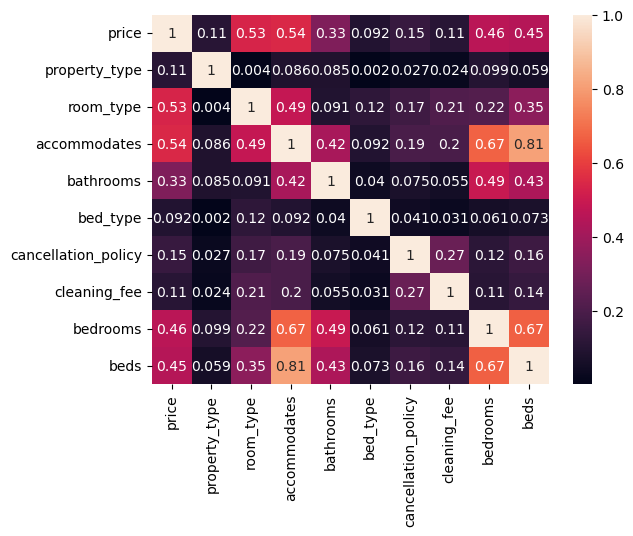

In [14]:
sns.heatmap(Data.select_dtypes(exclude='object').corr(), annot=True)